In [34]:
import numpy as np    # python library to use data strictures and numerical computiations 
import random         # to generate random numbers
import networkx as nx         # to handle the graph data structures 
import matplotlib.pyplot as plt      # to plot graphs 
import time                            #to find time consumed by functions and to find complexity of functions 
from collections import defaultdict    # to create distionary 
from networkx.generators.classic import empty_graph     #to make an empty graph 
MONTE_CARLO_N=500     # number of monte carlo iterations 

#### 1. Function to generate ER_Random graph 

In [35]:
def GenerateERRandomGraph(k, p):     #function to generate ER_Random graph 
    RG = nx.Graph()
    RG.add_nodes_from(range(k))
    for i in range(0,k):
        for j in range(0,k):
            if(i>j):
                ran=random.random();
                if(ran<=p):
                    RG.add_edge(i,j)
    return RG

### function to Generate R_Regular_Random Graph

In [36]:
def GenerateRRegularRandomGraph(k, d, seed=None):   
    if (k * d) % 2 != 0:            # check if k * d is even
        print("n * d must be even")

    if not 0 <= d < k:               #check if inequality is satisfied
        print("the 0 <= d < n inequality must be satisfied")

    if d == 0:
        return empty_graph(k)

    if seed is not None:
        random.seed(seed)

    def _suitable(edges, potential_edges):    # 
        if not potential_edges:
            return True
        for s1 in potential_edges:
            for s2 in potential_edges:
                if s1 == s2:
                    break
                if s1 > s2:
                    s1, s2 = s2, s1
                if (s1, s2) not in edges:
                    return True
        return False

    def _try_creation():
        edges = set()
        stubs = list(range(k)) * d

        while stubs:
            potential_edges = defaultdict(lambda: 0)
            random.shuffle(stubs)
            stubiter = iter(stubs)
            for s1, s2 in zip(stubiter, stubiter):
                if s1 > s2:
                    s1, s2 = s2, s1
                if s1 != s2 and ((s1, s2) not in edges):
                    edges.add((s1, s2))
                else:
                    potential_edges[s1] += 1
                    potential_edges[s2] += 1

            if not _suitable(edges, potential_edges):
                return None
            stubs = [node for node, potential in potential_edges.items()
                     for _ in range(potential)]
        return edges
    edges = _try_creation()
    while edges is None:
        edges = _try_creation()

    G = nx.Graph()
    G.name = "random_regular_graph(%s, %s)" % (d, k)
    G.add_edges_from(edges)

    return G


#### algebraic method 1 (irreducibility)

In [37]:
def CheckConnectivityIrreducible(G):   # 
    matrix=nx.to_numpy_matrix(G)
    n=len(G.nodes())
    I=np.identity(n);
    mat=I
    sum=I
    for i in range(n-1):
        mat=np.matmul(mat,matrix)
        sum=sum+mat
    if(np.all(sum!=0)):
        return True
    else:
        return False

In [38]:

def CheckConnectivityIrreducibleTimeCal(G,n):
    start = time.time()
    for i in range(n):
        CheckConnectivityIrreducible(G)
    end = time.time()
    return (end-start)/n



#### algebraic method 2 (eigenvalue of the Laplacian matrix)

In [39]:
def CheckConnectivityLaplacianMatrix(G):
    L = nx.laplacian_matrix(G)
    e = np.linalg.eigvals(L.A)
    num=sorted(e)[1]
    if(num==0):
        return False
    else:
        return True



In [40]:
def CheckConnectivityLaplacianMatrixTimeCal(G,n):
    start = time.time()
    for i in range(n):
        CheckConnectivityLaplacianMatrix(G)
    end = time.time()
    return (end-start)/n


#### breadth- first search algorithm.

In [41]:
def CheckConnectivityBFS(self, s=0):
    visited = [False] * (len(self.nodes))
    queue = []
    queue.append(s)
    visited[s] = True

    while queue:
        s = queue.pop(0)
        for i in self.adj[s]:
            if visited[i] == False:
                queue.append(i)
            visited[i] = True
    
    if all(item for item in visited):
        return True
    else:
        return False


In [42]:
def CheckConnectivityBFSTimeCal(G,n):
    start = time.time()
    for i in range(n):
        CheckConnectivityBFS(G)
    end = time.time()
    return (end-start)/n


##### Complexity of Irreducible Matrix Connectivity Algorithm

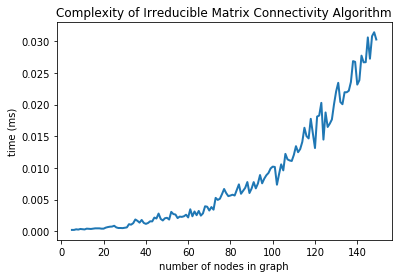

In [43]:
# Complexity charts of Connectivity Algorithms
t = np.arange(5, 150, 1)
timL=np.array([])
timI=np.array([])
timB=np.array([])
for i in t:
    g=GenerateERRandomGraph(i,0.2)
    timI=np.append(timI, CheckConnectivityIrreducibleTimeCal(g,20))

plt.plot(t, timI, lw=2)
plt.xlabel('number of nodes in graph')
plt.ylabel('time (ms)')
plt.title('Complexity of Irreducible Matrix Connectivity Algorithm')
plt.show()

##### Complexity of Laplacian Matrix Connectivity Algorithm

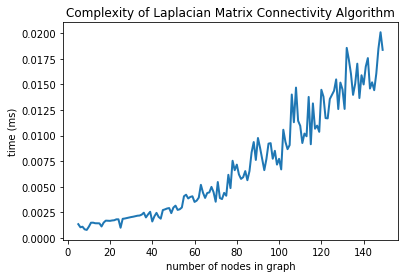

In [44]:
t = np.arange(5, 150, 1)
timL=np.array([])
timI=np.array([])
timB=np.array([])
for i in t:
    g=GenerateERRandomGraph(i,0.2)
    timL=np.append(timL, CheckConnectivityLaplacianMatrixTimeCal(g,20))

plt.plot(t, timL, lw=2)
plt.xlabel('number of nodes in graph')
plt.ylabel('time (ms)')
plt.title('Complexity of Laplacian Matrix Connectivity Algorithm')
plt.show()

##### Complexity of Breath first search Connectivity Algorithm

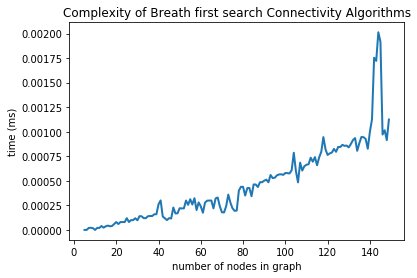

In [45]:
t = np.arange(5, 150, 1)
timL=np.array([])
timI=np.array([])
timB=np.array([])
for i in t:
    g=GenerateERRandomGraph(i,0.2)
    timB=np.append(timB, CheckConnectivityBFSTimeCal(g,50))

plt.plot(t, timB, lw=2)
plt.xlabel('number of nodes in graph')
plt.ylabel('time (ms)')
plt.title('Complexity of Breath first search Connectivity Algorithms')
plt.show()

##### Connectivity probability of ER random graph p when K=100

In [46]:
def MonteCarloConnecitivtyER(p):
    number=0
    for i in range(MONTE_CARLO_N):
        G=GenerateERRandomGraph(100,p)        #k=100
        if(CheckConnectivityBFS(G)):
            number+=1
    return number/MONTE_CARLO_N

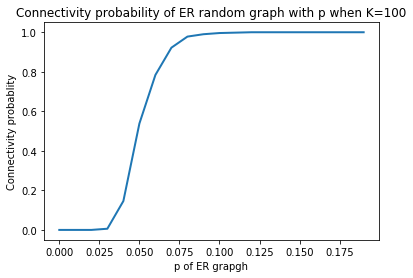

In [47]:
#connectivity probability
p = np.arange(0, 0.2, 0.01)
timL=np.array([])
for i in p:
    timL=np.append(timL, MonteCarloConnecitivtyER(i))

plt.plot(p, timL, lw=2)
#plt.plot(t, timI, lw=2)
plt.xlabel('p of ER grapgh')
plt.ylabel('Connectivity probablity')
plt.title('Connectivity probability of ER random graph with p when K=100')
plt.show()

##### Connectivity probability of R regular random graph with n as r=2

In [48]:
def MonteCarloConnecitivtyRR(n,r):
    number=0
    for i in range(MONTE_CARLO_N):
        G=GenerateRRegularRandomGraph(n,r)
        if(CheckConnectivityBFS(G)):
            number+=1
    return number/MONTE_CARLO_N

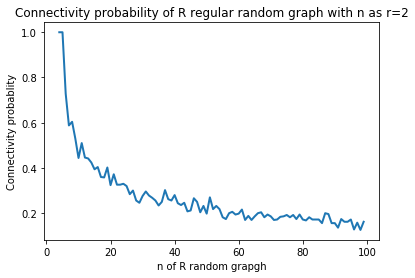

In [49]:
#connectivity probability
p = np.arange(4, 100, 1)
timL=np.array([])
for i in p:
    timL=np.append(timL, MonteCarloConnecitivtyRR(i,2))

plt.plot(p, timL, lw=2)
plt.xlabel('n of R random grapgh')
plt.ylabel('Connectivity probablity')
plt.title('Connectivity probability of R regular random graph with n as r=2')
plt.show()

###### Connectivity probability of R regular random graph with n as r=8

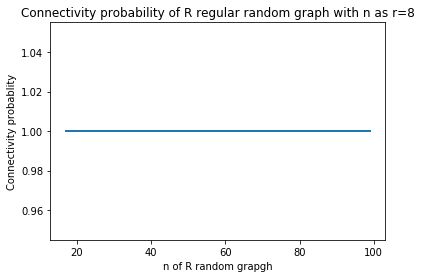

In [50]:
#connectivity probability
p = np.arange(17, 100, 1)
timL=np.array([])
for i in p:
    timL=np.append(timL, MonteCarloConnecitivtyRR(i,8))

plt.plot(p, timL, lw=2)
plt.xlabel('n of R random grapgh')
plt.ylabel('Connectivity probablity')
plt.title('Connectivity probability of R regular random graph with n as r=8')
plt.show()